# Getting Started with Qiskit

### Install Qiskit

In [69]:
%pip install qiskit --upgrade
%pip install qiskit-ibm-provider
%pip install pylatexenc

%pip install python-dotenv
%pip install matplotlib
%pip install seaborn


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is a

#### Import Packages

In [70]:
import numpy as np
import qiskit
print(qiskit.__version__)
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute

import os
from dotenv import load_dotenv

0.25.0


## 1. Create superposition of states


*Superposition* is the fundamental concept to describe the ability of a quantum system to exist in multiple states, that distinguishes it from the classical system.
We build a quantum circuit to generate an equiprobable superposition of $|0\rangle$ and $|1\rangle$ using a *Hadamard gate* $H$ :
$$
H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) = |+\rangle
$$
$$
H|1\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) = |-\rangle
$$

#### Build Quantum Circuits

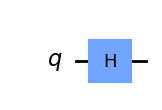

In [71]:
# Create a quantum circuit instance with one qubit
circuit1 = QuantumCircuit(1)

# Apply Hadamard Gate
circuit1.h(0)

# Draw quantum circuit
circuit1.draw(output = "mpl")

#### Simulate quantum circuit with statevector simulator

A `backend` refers to the device or simulator on which a quantum circuit is executed or simulated to obtain results. In Qiskit, we have a list of theoretical simulators that are avilable in open-source.

In [72]:
from qiskit import Aer

# Print all the available quantum simulators
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

Let us start from simulating the quantum circuit with Qiskit `statevector_simulator`, the most common backend to simulate an ideal quantum circuit. It returns the quantum state in a vector form.

In [73]:
# Load statevector simulator
simulator = Aer.get_backend("statevector_simulator")

# Create quatum job to execute
job1 = simulator.run(circuit1)

# Execute the job
result1 = job1.result()

state1 = result1.get_statevector(circuit1, decimals = 4)
print(state1)

Statevector([0.7071+0.j, 0.7071+0.j],
            dims=(2,))


### Visualizaiton of the quantum state as a bloch sphere

Now, let's display the quantum state on the *Bloch Sphere*.

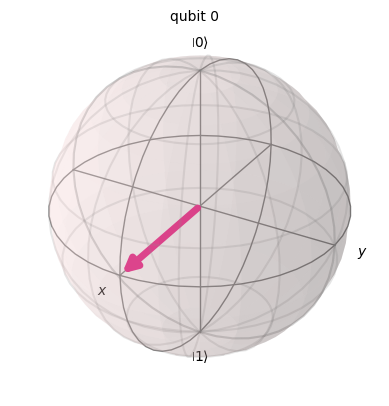

In [74]:
state1.draw(output = "bloch")

### Test different one qubit gates

You can test different single quantum gates using `statevector_simulator` and visualize how they act on the bloch sphere.

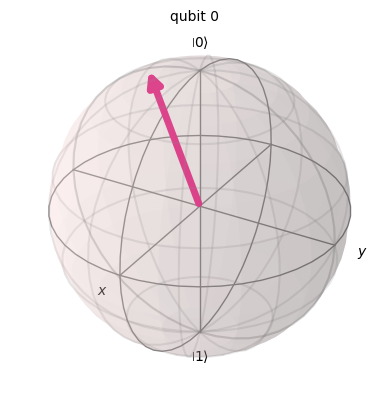

In [75]:
# Apply RX / RY / S /T gates
###### To do ######
circuit = QuantumCircuit(1)
circuit.rx(0.4, 0)

job = simulator.run(circuit)
result = job.result()
state = result.get_statevector()

###################
state.draw(output = "bloch")

## 2. Create Bell state

A *Bell state*, also known as an *EPR pair* (Einstein-Podolsky-Rosen pair), is a specific two-qubit state which is maximally entangled. Entanglement is another important phenomenon, which characterizes a quantum system, where the quantum states of two or more particles become correlated in such a way that the state of one particle cannot be described independently of the other, regardless of the distance between them.

On the quantum circuit, Bell state can be created by applying a set of quantum states to the initial state $|00\rangle$ :

$$
\begin{align}
& \text{Initial State} = |00\rangle \nonumber \\ \to & H_0|00\rangle  = \frac{1}{\sqrt{2}} (|00\rangle + |10\rangle) \nonumber \\
\to & CNOT_{01}  \frac{1}{\sqrt{2}} (|00\rangle + |10\rangle) = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)
\end{align}$$  

In [76]:
# Create quantum circuit with two quantum registers and two classical registers
circuit2 = QuantumCircuit(2, 2)

# Create Bell state following the expression above
# Apply Hadamard gate on the first and the second qubit
###### To Do ######
circuit2.h(0)
circuit2.cnot(0, 1)

###################

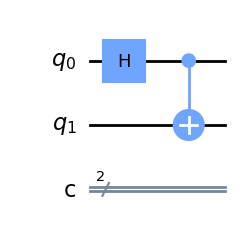

In [77]:
# Visualize the circuit
circuit2.draw(output = 'mpl')

In [78]:
# Create quatum job to execute
job2 = simulator.run(circuit2)

# Execute the job
result2 = job2.result()

state2 = result2.get_statevector(circuit2, decimals = 4)
print(state2)

Statevector([0.7071+0.j, 0.    +0.j, 0.    +0.j, 0.7071+0.j],
            dims=(2, 2))


#### Visualization of the state

Multi-qubit states can be visualized with the methods other than the bloch sphere.  
- `plot_state_city` : Displays the quantum states as the real and imaginary parts of the state matrix.
- `plot_state_hinton` : Sampe as `plot_state_city`, but as a 2D colour plot.
- `plot_state_qsphere` : Display the quantum state as a vector on a spherical ball. The thickness of the arrow corresponds to the amplitude of the state, and its color to the phase.

In [79]:
from qiskit.visualization import plot_state_city, plot_state_hinton, plot_state_qsphere, \
                                 plot_histogram

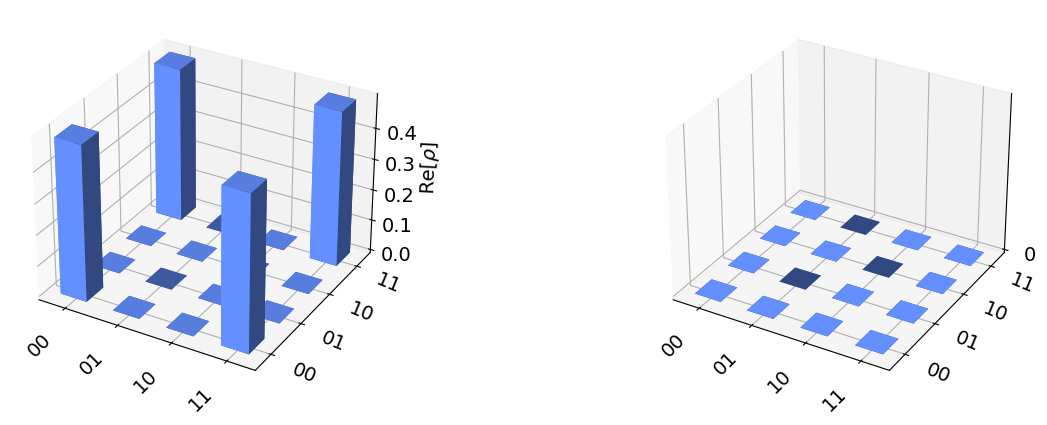

In [80]:
plot_state_city(state2)

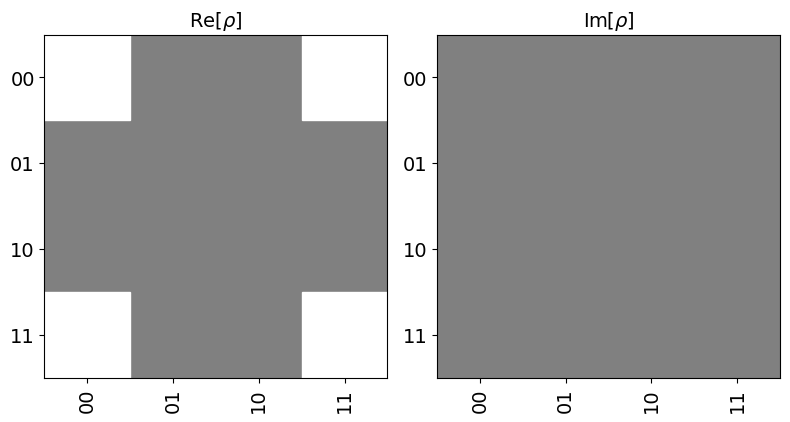

In [81]:
plot_state_hinton(state2)

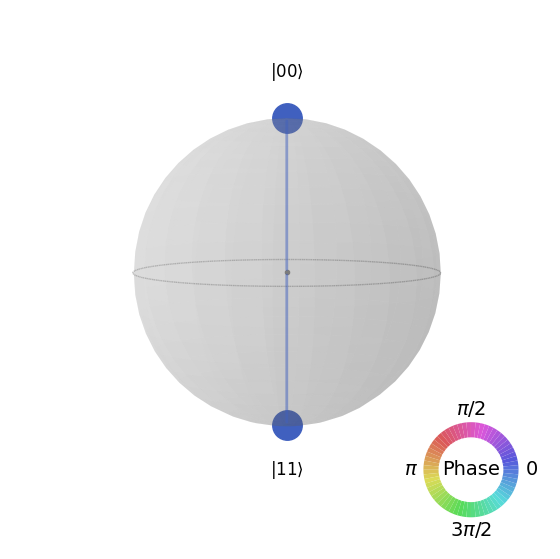

In [82]:
plot_state_qsphere(state2)

__To do :__   Build a quantum circuit to generate the state $|-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$ and display it using different visualization methods.

#### Simulate with Unitary simulator

In [83]:
# Run the quantum circuit on a unitary simulator backend
backend = Aer.get_backend('unitary_simulator')

# Create job and execute
job2 = backend.run(circuit2)
result2 = job2.result()

# Show the results
print(result2.get_unitary(circuit2, decimals=3))


Operator([[ 0.707+0.j,  0.707-0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707-0.j],
          [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


#### Simulate with Qasm simulator

Until now on, we simulated the quantum circuit. However in reality, we do not have direct access to the quantum state. Instead, each qubit should be *measured* at the end of the quantum circuit in specific basis (generally in the computational basis $|0\rangle, |1\rangle$). As soon as the quantum system is measured, the state $|\psi\rangle$ *collapses* to the measurement basis $|b\rangle$ with a probability :
$$
P(b) == |\langle b | \psi \rangle |^2.
$$
Unlike the previous steps where the quantum circuit only required `QuantumRegister` to be simulated, we need to add `ClassicalRegister` to measure the quantum circuit.

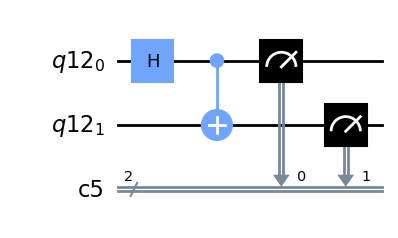

In [84]:
# Initialize quantum and classical registers
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

# Build quantum circuit
circuit3 = QuantumCircuit(qr, cr)

#Create Bell state
###### To Do ######

circuit3.h(0)
circuit3.cnot(0,1)

###################

# Measure qubits
circuit3.measure(qr, cr)
#circuit.measure_all()

circuit3.draw(output = 'mpl')

In [85]:
backend = Aer.get_backend("qasm_simulator")

In [86]:
shots = 1024
job3 = execute(circuit3, backend, shots = shots)
result3 = job3.result()

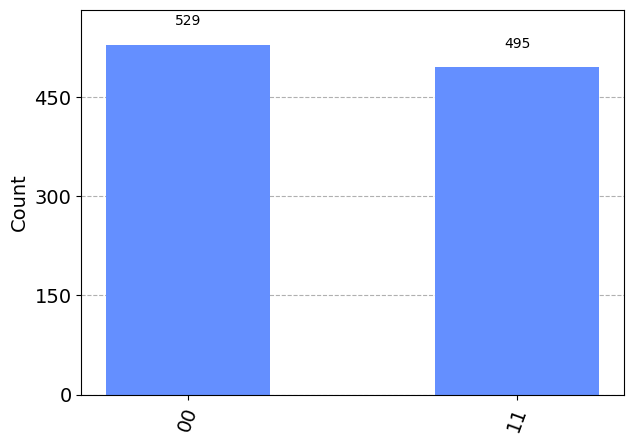

In [87]:
counts = result3.get_counts()
plot_histogram(counts)

### Run using noisy model

Till now on, the quantum circuits are simulated in the ideal setting in the absence of noises. However, in reality, quantum computers are inherently prone to errors from various noise sources, such as *decoherence*, *gate errors* and *readout errors*.  

Qiskit provides tools to work with [*noise models*](https://qiskit.org/ecosystem/aer/tutorials/3_building_noise_models.html) which mimics the noise experienced by quantum circuits when executed on real quantum hardware. It allows the users to better understand the errors during the execution and the challenges of the quantum algorithms before running it on the real device, which has limited access.

In this section, we will run the quantum circuit with a noise model which mimics the real IBM Quantum device *IBMQ_lima*. To do so, we should create first [IBM Quantum](https://quantum-computing.ibm.com/) account.  

In [88]:
from qiskit_aer import AerSimulator
from qiskit_ibm_provider import IBMProvider

1. Go to [IBM Quantum](https://quantum-computing.ibm.com/) website.

<img src="images/ibmq1.png" alt="ibmq_image1" width="600"/>

2. Create a new IBM Quantum account.

<img src="images/ibmq2.png" alt="ibmq_image2" width="600"/>

4. Go to account setting.

<img src="images/ibmq3.png" alt="ibmq_image3" width="600"/>


4. Generate API token and copy it.

<img src="images/ibmq4.png" alt="ibmq_image4" width="600"/>


In [89]:
# Save you credential on disck
IBMProvider.save_account(os.environ.get('API_TOKEN'), overwrite= True)

In [90]:
# Load your IBM instance
provider = IBMProvider(instance='ibm-q/open/main')

In [91]:
print(provider.backends())

[<IBMBackend('ibmq_qasm_simulator')>, <IBMBackend('ibmq_belem')>, <IBMBackend('simulator_extended_stabilizer')>, <IBMBackend('simulator_mps')>, <IBMBackend('ibmq_manila')>, <IBMBackend('ibm_perth')>, <IBMBackend('ibmq_jakarta')>, <IBMBackend('ibmq_quito')>, <IBMBackend('ibmq_lima')>, <IBMBackend('simulator_statevector')>, <IBMBackend('simulator_stabilizer')>, <IBMBackend('ibm_nairobi')>, <IBMBackend('ibm_lagos')>]


In [92]:
# We use IBMQ lima
device_backend = provider.get_backend('ibmq_lima')

In [93]:
# Display device configuration.

config = device_backend.configuration()
print("This backend is called {} (version {}) with {} qubit{}. "
      "\nThe basis gates supported on this device are {}."
      "".format(config.backend_name,
                config.backend_version,
                config.n_qubits,
                '' if config.n_qubits == 1 else 's',
                config.basis_gates))

This backend is called ibmq_lima (version 1.0.49) with 5 qubits. 
The basis gates supported on this device are ['cx', 'id', 'rz', 'sx', 'x'].


Ideally, we assume that all the qubits are connected to all the other qubits. However, on the real quantum computers, the physical qubits have limited *Connectivity*, i.e. the ability to interact with other qubits through quantum gates, which can be visualized with *Coupling Map*.

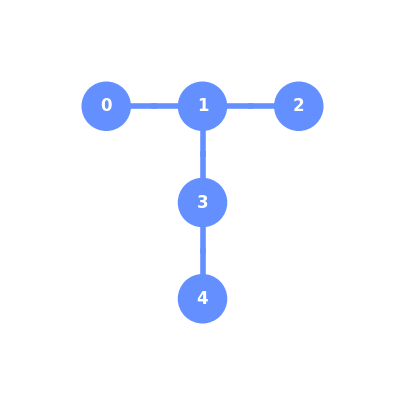

In [94]:
from qiskit.visualization import plot_coupling_map
qubit_coordinates = [[0, 0], [0, 1], [0, 2], [1, 1], [2, 1]]

plot_coupling_map(config.n_qubits, qubit_coordinates, config.coupling_map)

The physical qubits are described with different features, such as :
- *Gate Error* probabilty of the basis gate on each qubit
- *Decoherence time* for which a qubit takes to lose its quantum information
 - $T_1$, *Relaxation time* : Measures how long the qubit stays in the excited state $|1\rangle$ before it relaxes into the ground state $|0\rangle$.
 - $T_2$, *Dephasing time* : Measures how long a qubit to lose the phase of a qubit stays.
- *Readout error* : Error that occurs in the final classical value during the measurement.

Note that `device_backend.configuration()` gives the static backend setup such as its name, version, number of qubits, while `device_backend.properties` contains the information on the measured and reported backend characteristics, which can be callibrated.

In [95]:
props = device_backend.properties()

def display_qubit_info(qubit, properties):
    """Print a string describing some of reported properties of the given qubit."""

    # Conversion factors from standard SI units
    us = 1e6
    ns = 1e9

    print("Qubit {0} has a \n"
          "  - T1 time of {1:.2f} microseconds\n"
          "  - T2 time of {2:.2f} microseconds\n"
          "  - U2 gate error of {3:.2e}\n"
          "  - Readout error of {4:.2e} ".format(
              qubit,
              properties.t1(qubit) * us,
              properties.t2(qubit) * us,
              properties.gate_error('sx', qubit),
              properties.readout_error(qubit)))

display_qubit_info(0, props)

Qubit 0 has a 
  - T1 time of 72.73 microseconds
  - T2 time of 110.96 microseconds
  - U2 gate error of 3.83e-04
  - Readout error of 1.89e-02 


We generate a *Noise model* from the properties of the real device backend.

In [96]:
sim_lima = AerSimulator.from_backend(device_backend)

Now, we construct 3-qubits entangled states, so-called *Greenberger–Horne–Zeilinger state (GHZ) state*.  
$$
|\psi\rangle = \frac{1}{\sqrt{2}}(|000\rangle + |111\rangle)
$$

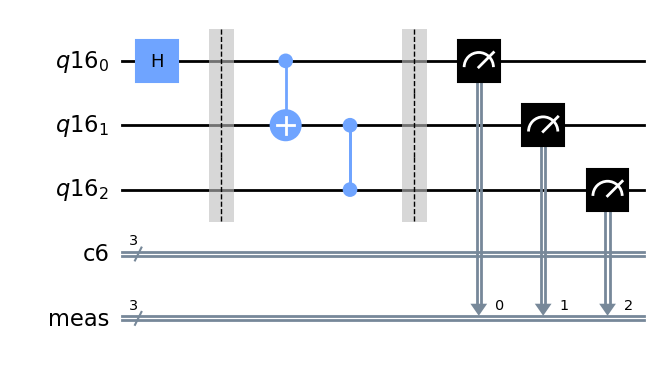

In [97]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
circuit4 = QuantumCircuit(qr, cr)

###### To Do ######
circuit4.h(0)
circuit4.barrier()
circuit4.cnot(0, 1)
circuit4.cz(1,2)

circuit4.measure_all()

###################

circuit4.draw(output = 'mpl')

The circuit drawing above displays the quantum gates which are mathematically defined in Qiskit. However, on the real quantum devices, the circuits can be only ran with the basis gates with a specific connectivity.  
Qiskit `transpile` function allows to rewrite and optimize the circuit based on the real device constrains.

<img src="images/transpiling_core_steps.png" alt="Transpile Step" width="600"/>


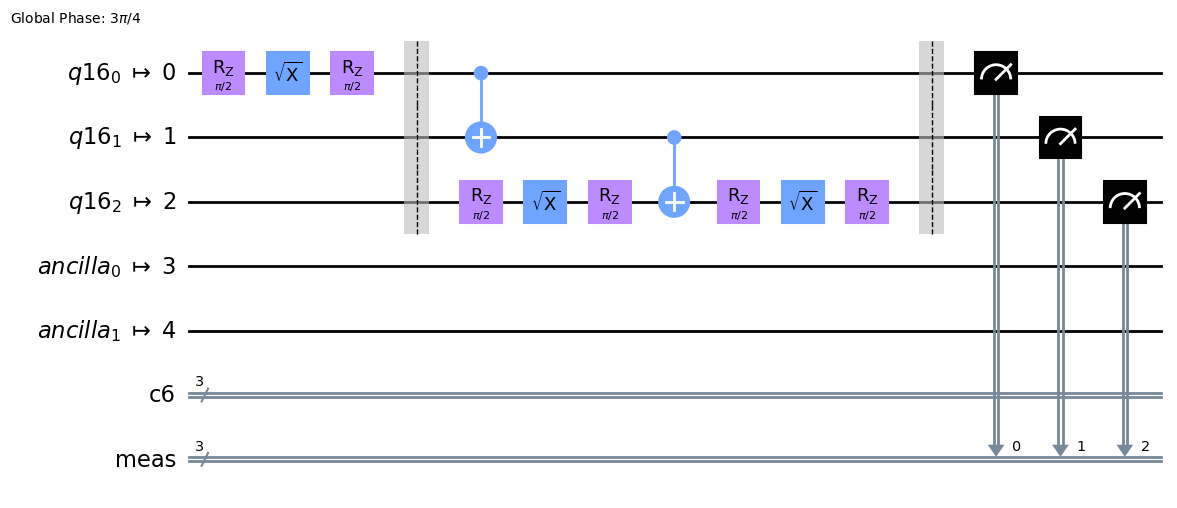

In [98]:
from qiskit import transpile

transpiled_circuit = transpile(circuit4, sim_lima)
transpiled_circuit.draw(output = "mpl")


__Question :__ What is the difference between the `circuit4` and `transpiled_circuit` ?

__Answer :__

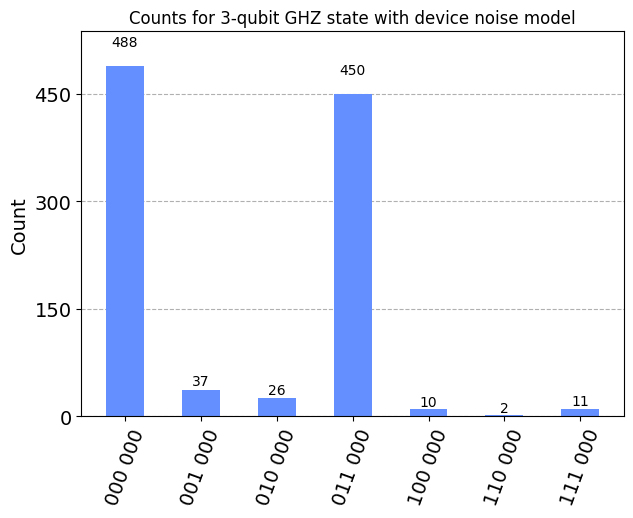

In [99]:
result_noise = sim_lima.run(transpiled_circuit).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise,
               title="Counts for 3-qubit GHZ state with device noise model")

__Question :__ Explain what you observe in the result by running the quantum circuit in a noisy setup. What is the difference from the result obtained in the ideal setup?

__Answer :__